In [1]:
#ARIMA MODEL

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.3 MB/s eta 0:00:00


In [3]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
#Read the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/AveargeTemp.csv')
df

,DATE,AvgTemp
0,01-01-2014,40
1,02-01-2014,43
2,03-01-2014,41
3,04-01-2014,37
4,05-01-2014,31
...,...,...
1816,26-12-2018,40
1817,27-12-2018,39
1818,28-12-2018,40
1819,29-12-2018,42


In [5]:
df['AvgTemp']

0       40
1       43
2       41
3       37
4       31
        ..
1816    40
1817    39
1818    40
1819    42
1820    46
Name: AvgTemp, Length: 1821, dtype: int64

<Axes: >

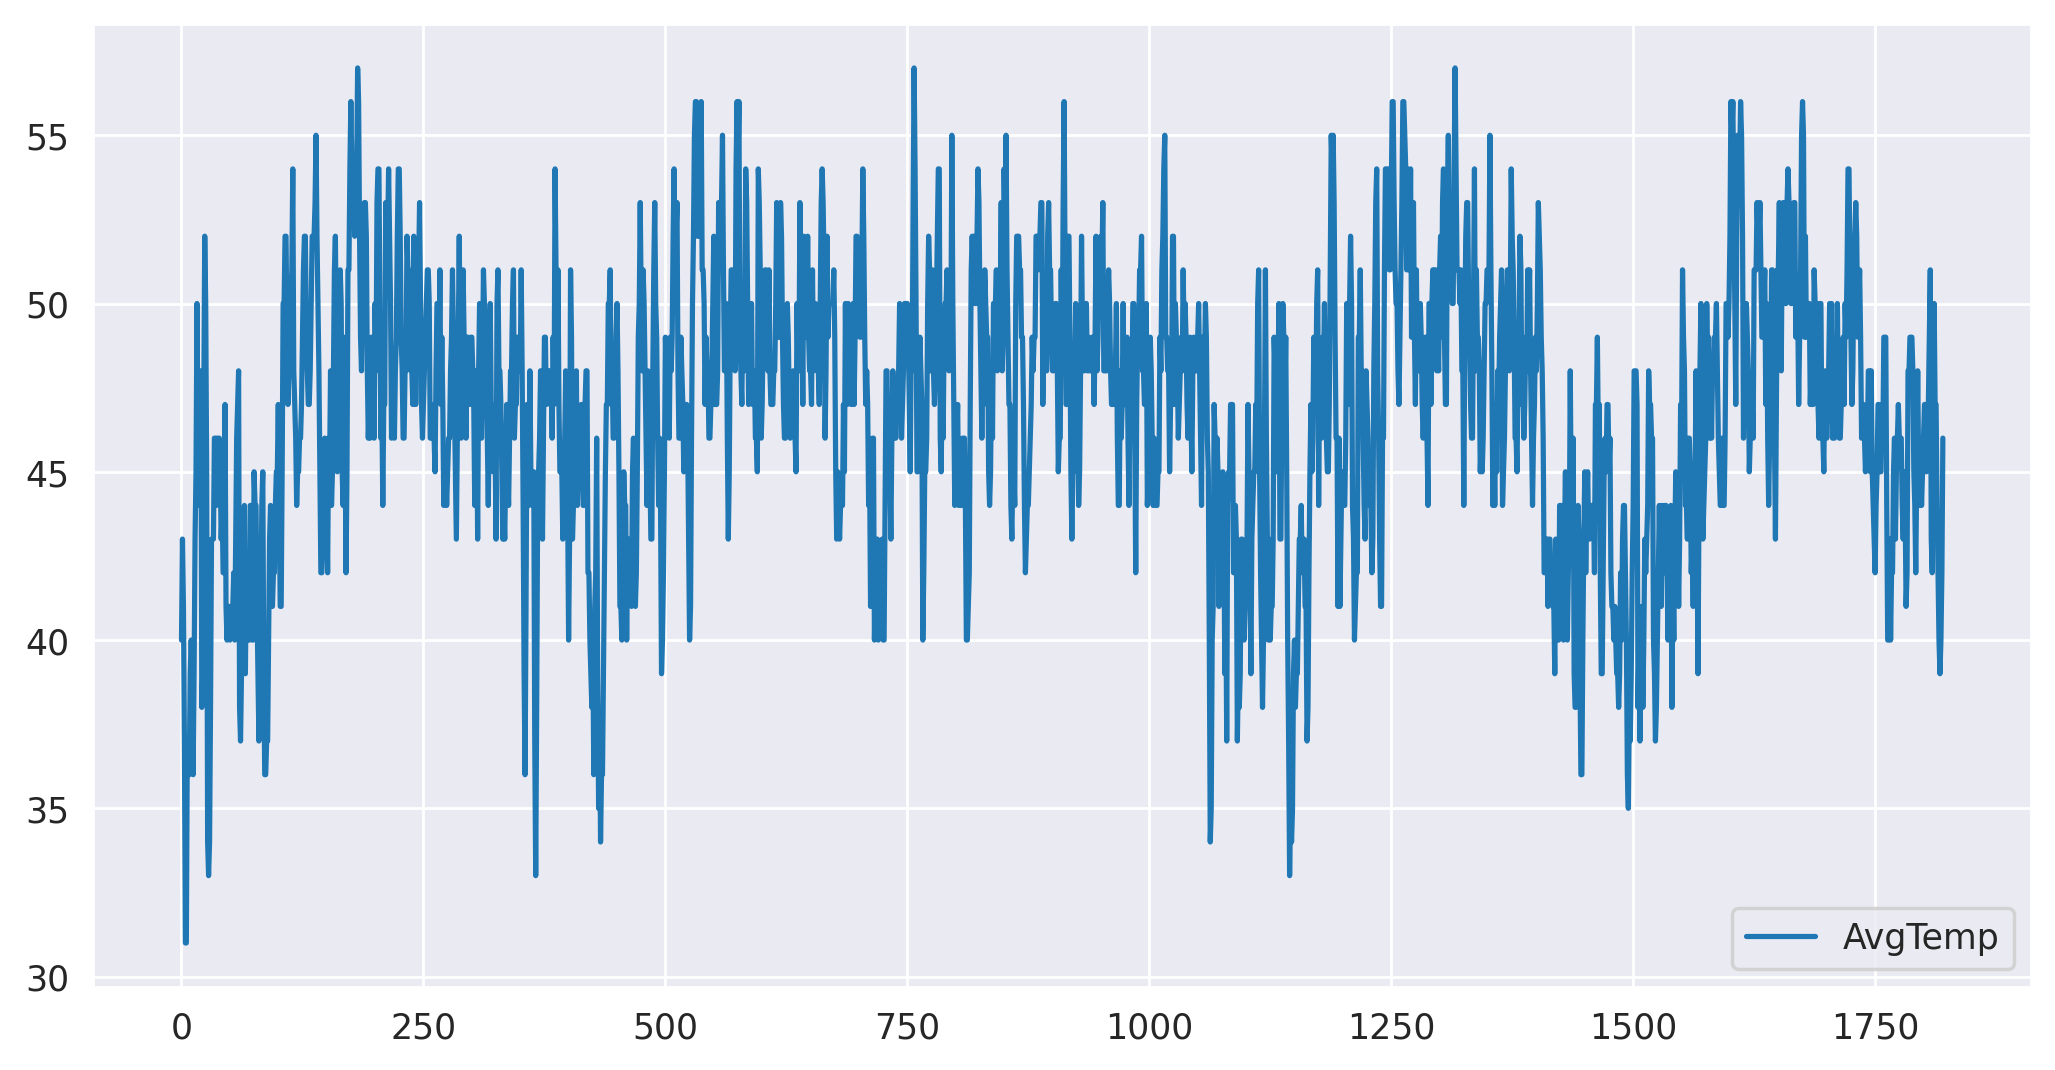

In [6]:
df.plot()

In [7]:
adfuller(df['AvgTemp'])[1]

8.675937480199653e-09

In [8]:
#Find out Order of ARIMA
order = auto_arima(df['AvgTemp'])
order

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [9]:
df.shape

(1821, 2)

In [10]:
#Split the Data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [11]:
train.shape

(1791, 2)

In [12]:
test.shape

(30, 2)

In [13]:
#ARIMA Model

In [14]:
model = ARIMA(train['AvgTemp'],order=(1, 0, 5)).fit()

In [15]:
#Evaluating the Model

In [16]:
test

,DATE,AvgTemp
1791,01-12-2018,44
1792,02-12-2018,42
1793,03-12-2018,45
1794,04-12-2018,48
1795,05-12-2018,45
1796,06-12-2018,44
1797,07-12-2018,45
1798,08-12-2018,44
1799,09-12-2018,45
1800,10-12-2018,46


In [19]:
ypred = model.predict(start=1791,end=1820)
ypred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933418
1803    45.942808
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987769
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075922
1820    46.083261
Name: predicted_mean, dtype: float64

In [20]:
print(np.sqrt(mean_squared_error(test['AvgTemp'],ypred)))

3.000463825206671
